# Link 1

### Python OpenCV: Optical Flow with Lucas-Kanade method

$Syntax: cv2.calcOpticalFlowPyrLK(prevImg, nextImg, prevPts, nextPts[, winSize[, maxLevel[, criteria]]])$

Parameters:
1. prevImg – first 8-bit input image
2. nextImg – second input image
3. prevPts – vector of 2D points for which the flow needs to be found.
4. winSize – size of the search window at each pyramid level.
5. maxLevel – 0-based maximal pyramid level number; if set to 0, pyramids are not used (single level), if set to 1, two levels are used, and so on.
6. criteria – parameter, specifying the termination criteria of the iterative search algorithm.

Return:

- nextPts – output vector of 2D points (with single-precision floating-point coordinates) containing the calculated new positions of input features in the second image; when OPTFLOW_USE_INITIAL_FLOW flag is passed, the vector must have the same size as in the input.
- status – output status vector (of unsigned chars); each element of the vector is set to 1 if the flow for the corresponding features has been found, otherwise, it is set to 0.
- err – output vector of errors; each element of the vector is set to an error for the corresponding feature, type of the error measure can be set in flags parameter; if the flow wasn’t found then the error is not defined (use the status parameter to find such cases).

<ipython-input-28-c6c44272991c>:52: DeprecationWarning: an integer is required (got type numpy.float32).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  mask = cv2.line(mask, (a, b), (c, d),
<ipython-input-28-c6c44272991c>:55: DeprecationWarning: an integer is required (got type numpy.float32).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  frame = cv2.circle(frame, (a, b), 5,


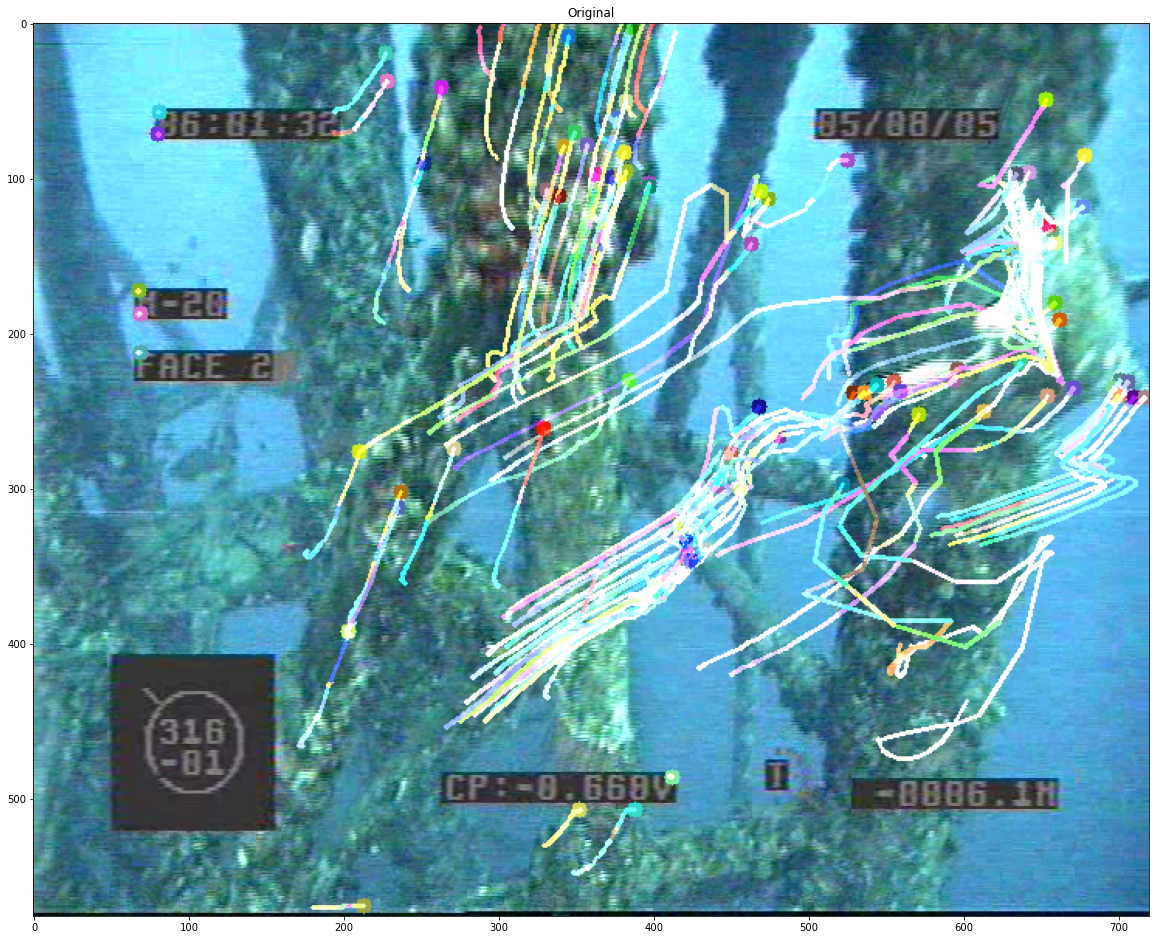

In [28]:
import numpy as np 
import cv2 
  
cap = cv2.VideoCapture('../../Sprint 8/Task 4/video/Marine.asf') 
  
# params for corner detection 
feature_params = dict( maxCorners = 100, 
                       qualityLevel = 0.3, 
                       minDistance = 7, 
                       blockSize = 7 ) 
  
# Parameters for lucas kanade optical flow 
lk_params = dict( winSize = (15, 15), 
                  maxLevel = 2, 
                  criteria = (cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 
                              10, 0.03)) 
  
# Create some random colors 
# np.random.randint(start, stop, size of array(x, y)) 
color = np.random.randint(0, 255, (100, 3)) 
  
# Take first frame and find corners in it 
ret, old_frame = cap.read() 
old_gray = cv2.cvtColor(old_frame, 
                        cv2.COLOR_BGR2GRAY) 
p0 = cv2.goodFeaturesToTrack(old_gray, mask = None, 
                             **feature_params) 
  
# Create a mask image for drawing purposes 
mask = np.zeros_like(old_frame) 
  
while(1): 
      
    ret, frame = cap.read() 
    frame_gray = cv2.cvtColor(frame, 
                              cv2.COLOR_BGR2GRAY) 
  
    # calculate optical flow 
    p1, st, err = cv2.calcOpticalFlowPyrLK(old_gray, 
                                           frame_gray, 
                                           p0, None, 
                                           **lk_params) 
  
    # Select good points 
    good_new = p1[st == 1] 
    good_old = p0[st == 1] 
  
    # draw the tracks 
    for i, (new, old) in enumerate(zip(good_new,  
                                       good_old)): 
        a, b = new.ravel() 
        c, d = old.ravel() 
        mask = cv2.line(mask, (a, b), (c, d), 
                        color[i].tolist(), 2) 
          
        frame = cv2.circle(frame, (a, b), 5, 
                           color[i].tolist(), -1) 
          
    img = cv2.add(frame, mask) 
  
    cv2.imshow('frame', img) 
      
    k = cv2.waitKey(25) 
    if k == 27: 
        break
  
    # Updating Previous frame and points  
    old_gray = frame_gray.copy() 
    p0 = good_new.reshape(-1, 1, 2) 
  
cv2.destroyAllWindows() 
cap.release() 
plt.figure(figsize=(20,20))
frame = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 
plt.subplot(111), plt.imshow(frame), plt.title("Original")
plt.show()

# Link 2

### Python OpenCV – Dense optical flow

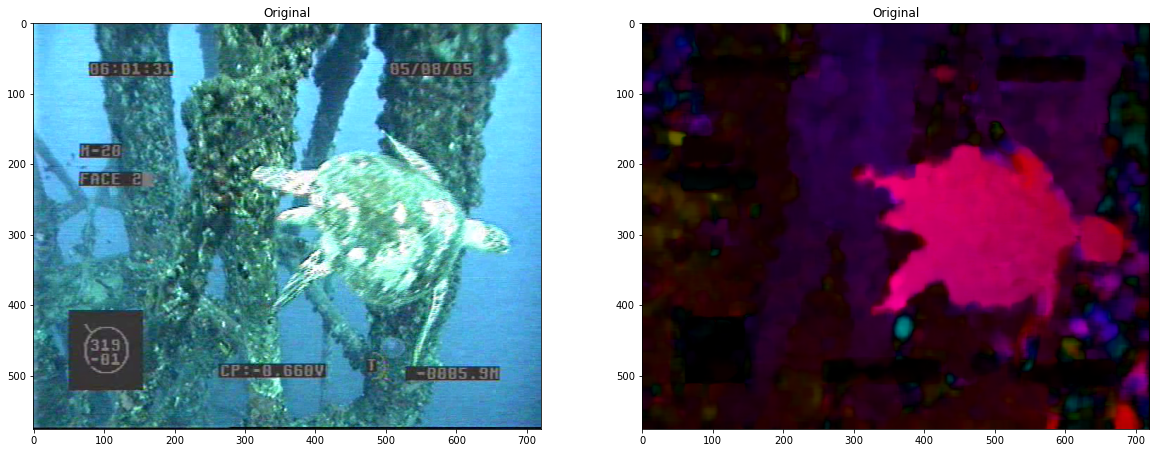

In [30]:
import cv2 as cv 
import numpy as np 
  
  
# The video feed is read in as 
# a VideoCapture object 
cap = cv.VideoCapture("../../Sprint 8/Task 4/video/Marine.asf") 
  
# ret = a boolean return value from 
# getting the frame, first_frame = the 
# first frame in the entire video sequence 
ret, first_frame = cap.read() 
  
# Converts frame to grayscale because we 
# only need the luminance channel for 
# detecting edges - less computationally  
# expensive 
prev_gray = cv.cvtColor(first_frame, cv.COLOR_BGR2GRAY) 
  
# Creates an image filled with zero 
# intensities with the same dimensions  
# as the frame 
mask = np.zeros_like(first_frame) 
  
# Sets image saturation to maximum 
mask[..., 1] = 255
  
while(cap.isOpened()): 
      
    # ret = a boolean return value from getting 
    # the frame, frame = the current frame being 
    # projected in the video 
    ret, frame = cap.read() 
      
    # Opens a new window and displays the input 
    # frame 
    cv.imshow("input", frame) 
      
    # Converts each frame to grayscale - we previously  
    # only converted the first frame to grayscale 
    gray = cv.cvtColor(frame, cv.COLOR_BGR2GRAY) 
      
    # Calculates dense optical flow by Farneback method 
    flow = cv.calcOpticalFlowFarneback(prev_gray, gray,  
                                       None, 
                                       0.5, 3, 15, 3, 5, 1.2, 0) 
      
    # Computes the magnitude and angle of the 2D vectors 
    magnitude, angle = cv.cartToPolar(flow[..., 0], flow[..., 1]) 
      
    # Sets image hue according to the optical flow  
    # direction 
    mask[..., 0] = angle * 180 / np.pi / 2
      
    # Sets image value according to the optical flow 
    # magnitude (normalized) 
    mask[..., 2] = cv.normalize(magnitude, None, 0, 255, cv.NORM_MINMAX) 
      
    # Converts HSV to RGB (BGR) color representation 
    rgb = cv.cvtColor(mask, cv.COLOR_HSV2BGR) 
      
    # Opens a new window and displays the output frame 
    cv.imshow("dense optical flow", rgb) 
      
    # Updates previous frame 
    prev_gray = gray 
      
    # Frames are read by intervals of 1 millisecond. The 
    # programs breaks out of the while loop when the 
    # user presses the 'q' key 
    if cv.waitKey(1) & 0xFF == ord('q'): 
        break
  
# The following frees up resources and 
# closes all windows 
cap.release() 
cv.destroyAllWindows()

plt.figure(figsize=(20,20))
frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB) 
plt.subplot(121), plt.imshow(frame), plt.title("Original")
frame = cv2.cvtColor(rgb, cv2.COLOR_BGR2RGB) 
plt.subplot(122), plt.imshow(frame), plt.title("Original")
plt.show()

### Python | Visualizing image in different color spaces

RGB Image :
RGB image is represented by linear combination of 3 different channels which are R(Red), G(Green) and B(Blue). Pixel intensities in this color space are represented by values ranging from 0 to 255 for single channel. Thus, number of possibilities for one color represented by a pixel is 16 million approximately [255 x 255 x 255 ].

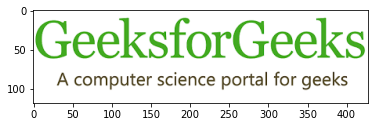

In [39]:
# Python program to read image as RGB 
  
# Importing cv2 and matplotlib module 
import cv2 
import matplotlib.pyplot as plt 
  
# reads image as RGB 
img = cv2.imread('../Task 3/img/GeeksForGeeks.png') 
  
# shows the image 
plt.imshow(img) 

Gray Scale Image :
Grayscale image contains only single channel. Pixel intensities in this color space is represented by values ranging from 0 to 255. Thus, number of possibilities for one color represented by a pixel is 256.

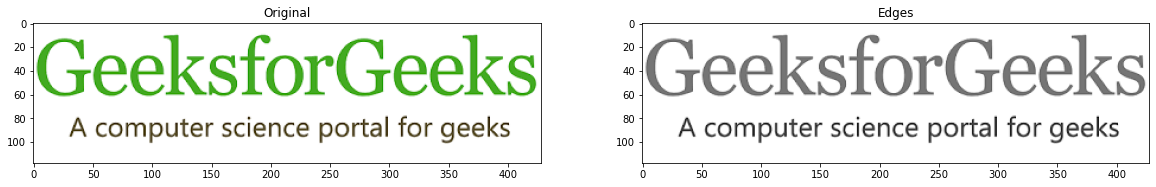

In [46]:
# Python program to read image as GrayScale 
  
# Importing cv2 module 
import cv2 
  
# Reads image as gray scale 
img = cv2.imread('../Task 3/img/GeeksForGeeks.png', 0)  
Original = cv2.imread('../Task 3/img/GeeksForGeeks.png')    
# We can alternatively convert 
# image by using cv2color 
#img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 
  
# Shows the image 
# cv2.imshow('image', img)  
  
# cv2.waitKey(0)          
# cv2.destroyAllWindows() 
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 
plt.figure(figsize=(20,20))
plt.subplot(121), plt.imshow(Original), plt.title("Original")
plt.subplot(122), plt.imshow(img), plt.title("Edges")
plt.show()

YCrCb Color Space :
Y represents Luminance or Luma component, Cb and Cr are Chroma components. Cb represents the blue-difference (difference of blue component and Luma Component). Cr represents the red-difference (difference of red component and Luma Component).

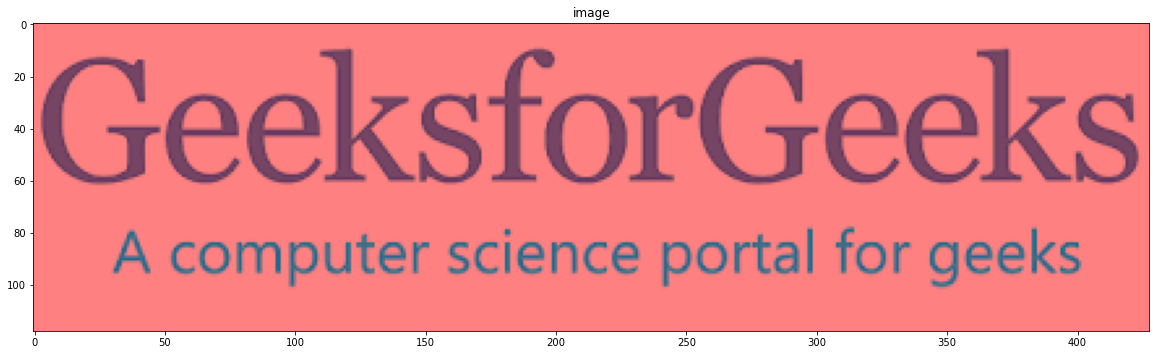

In [57]:
# Python program to read image 
# as YCrCb color space 
  
# Import cv2 module 
import cv2 
  
# Reads the image 
img = cv2.imread('../Task 3/img/GeeksForGeeks.png') 
  
# Convert to YCrCb color space 
img = cv2.cvtColor(img, cv2.COLOR_BGR2YCrCb) 
  
# Shows the image 
cv2.imshow('image', img)  
  
cv2.waitKey(0)          
cv2.destroyAllWindows()

plt.figure(figsize=(20,20))
plt.subplot(111), plt.imshow(img), plt.title("image")
plt.show()

HSV color space :
H : Hue represents dominant wavelength.
S : Saturation represents shades of color.
V : Value represents Intensity.

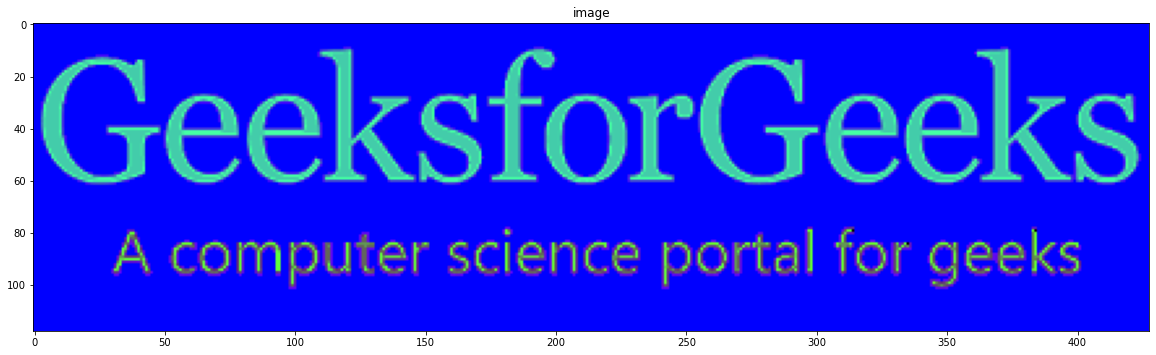

In [58]:
# Python program to read image 
# as HSV color space 
  
# Importing cv2 module 
import cv2 
  
# Reads the image 
img = cv2.imread('../Task 3/img/GeeksForGeeks.png') 
  
# Converts to HSV color space 
img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV) 
  
# Shows the image 
cv2.imshow('image', img)  
  
cv2.waitKey(0)          
cv2.destroyAllWindows() 

plt.figure(figsize=(20,20))
plt.subplot(111), plt.imshow(img), plt.title("image")
plt.show()

LAB color space :
L – Represents Lightness.
A – Color component ranging from Green to Magenta.
B – Color component ranging from Blue to Yellow.

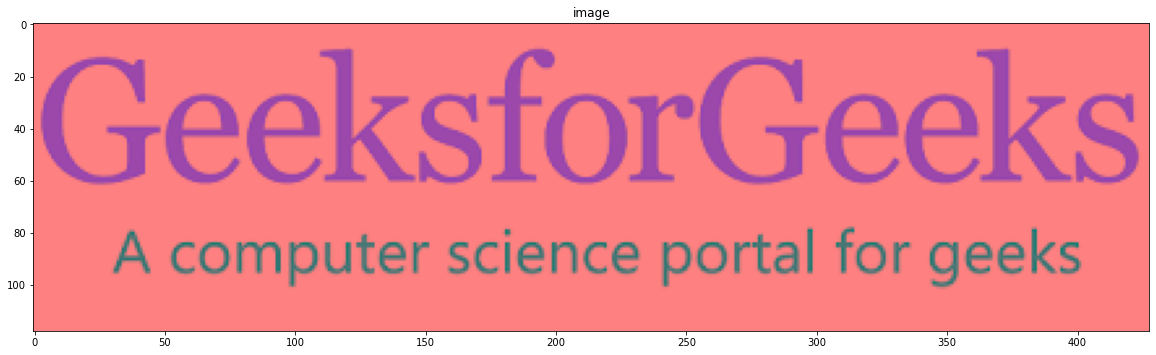

In [60]:
# Python program to read image 
# as LAB color space 
  
# Importing cv2 module 
import cv2 
  
# Reads the image 
img = cv2.imread('../Task 3/img/GeeksForGeeks.png') 
  
# Converts to LAB color space 
img = cv2.cvtColor(img, cv2.COLOR_BGR2LAB) 
  
# Shows the image 
cv2.imshow('image', img)  
  
cv2.waitKey(0)          
cv2.destroyAllWindows()

plt.figure(figsize=(20,20))
plt.subplot(111), plt.imshow(img), plt.title("image")
plt.show()

Edge map of image :
Edge map can be obtained by various filters like laplacian, sobel, etc. Here, we use Laplacian to generate edge map.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


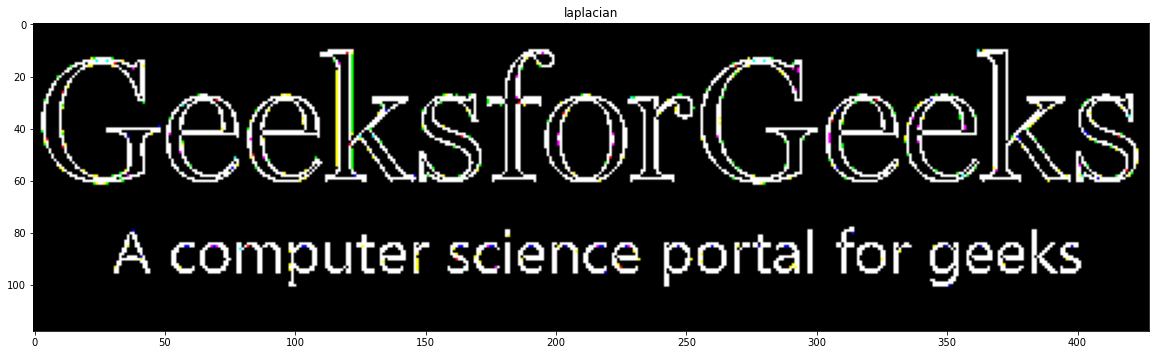

In [63]:
# Python program to read image 
# as EdgeMap 
  
# Importing cv2 module 
import cv2 
  
# Reads the image 
img = cv2.imread('../Task 3/img/GeeksForGeeks.png') 
  
  
laplacian = cv2.Laplacian(img, cv2.CV_64F) 
cv2.imshow('EdgeMap', laplacian)  
  
cv2.waitKey(0)          
cv2.destroyAllWindows() 

plt.figure(figsize=(20,20))
plt.subplot(111), plt.imshow(laplacian), plt.title("laplacian")
plt.show()

Heat map of image :
In Heat map representation, individual values contained in a matrix are represented as colors.

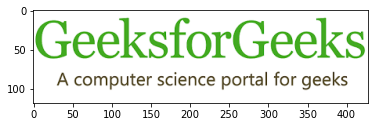

In [68]:
# Python program to visualize  
# Heat map of image 
  
# Importing matplotlib and cv2 
import matplotlib.pyplot as plt 
import cv2 
  
# reads the image 
img = cv2.imread('../Task 3/img/GeeksForGeeks.png') 
  
# plot heat map image 
plt.imshow(img, cmap ='hot')  


Spectral Image map :
Spectral Image map obtains the spectrum for each pixel in the image of a scene.

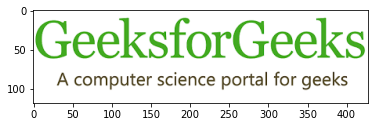

In [69]:
# Python program to visualize  
# Spectral map of image 
  
# Importing matplotlib and cv2 
import matplotlib.pyplot as plt 
import cv2 
  
img = cv2.imread('../Task 3/img/GeeksForGeeks.png') 
plt.imshow(img, cmap ='nipy_spectral') 

# Link 4

### Find Co-ordinates of Contours using OpenCV | Python

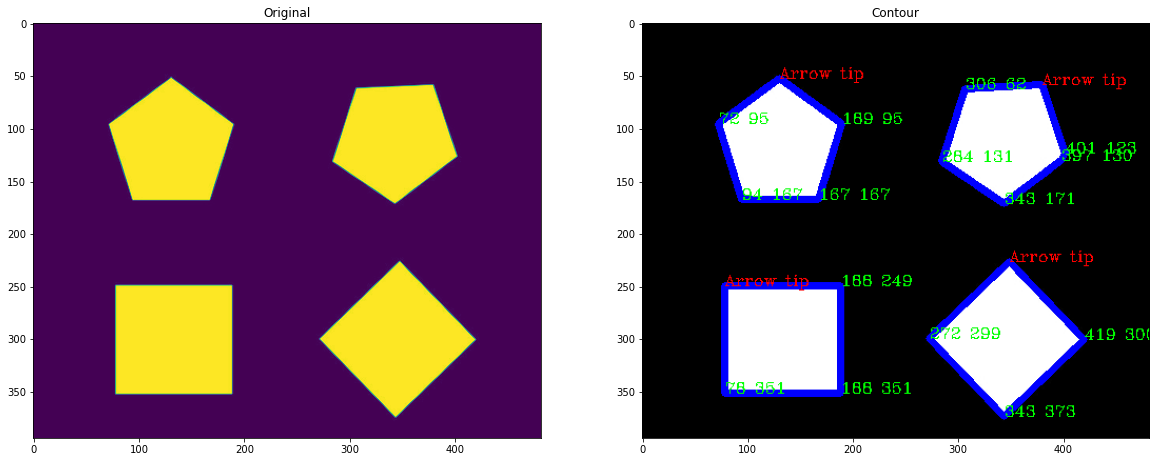

In [77]:
# Python code to find the co-ordinates of 
# the contours detected in an image. 
import numpy as np 
import cv2 
  
# Reading image 
font = cv2.FONT_HERSHEY_COMPLEX 
img2 = cv2.imread('img/Contour.jpg', cv2.IMREAD_COLOR) 
#img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
# Reading same image in another  
# variable and converting to gray scale. 
img = cv2.imread('img/Contour.jpg', cv2.IMREAD_GRAYSCALE) 
  
# Converting image to a binary image 
# ( black and white only image). 
_, threshold = cv2.threshold(img, 110, 255, cv2.THRESH_BINARY) 
  
# Detecting contours in image. 
contours, _= cv2.findContours(threshold, cv2.RETR_TREE, 
                               cv2.CHAIN_APPROX_SIMPLE) 
  
# Going through every contours found in the image. 
for cnt in contours : 
  #cv2.approxPolyDP(cnt,epsilon,True)
    approx = cv2.approxPolyDP(cnt, 0.009 * cv2.arcLength(cnt, True), True) 
  
    # draws boundary of contours. 
    cv2.drawContours(img2, [approx], 0, (0, 0, 255), 5)  
  
    # Used to flatted the array containing 
    # the co-ordinates of the vertices. 
    n = approx.ravel()  
    i = 0
  
    for j in n : 
        if(i % 2 == 0): 
            x = n[i] 
            y = n[i + 1] 
  
            # String containing the co-ordinates. 
            string = str(x) + " " + str(y)  
  
            if(i == 0): 
                # text on topmost co-ordinate. 
                cv2.putText(img2, "Arrow tip", (x, y), 
                                font, 0.5, (255, 0, 0))  
            else: 
                # text on remaining co-ordinates. 
                cv2.putText(img2, string, (x, y),  
                          font, 0.5, (0, 255, 0))  
        i = i + 1
  
# Showing the final image. 
cv2.imshow('image2', img2)  
  
# Exiting the window if 'q' is pressed on the keyboard. 
if cv2.waitKey(0) & 0xFF == ord('q'):  
    cv2.destroyAllWindows()

plt.figure(figsize=(20,20))
 
plt.subplot(121), plt.imshow(img), plt.title("Original")
plt.subplot(122), plt.imshow(img2), plt.title("Contour")
plt.show()

# Link 5

### Find and Draw Contours using OpenCV | Python

Number of Contours found = 4


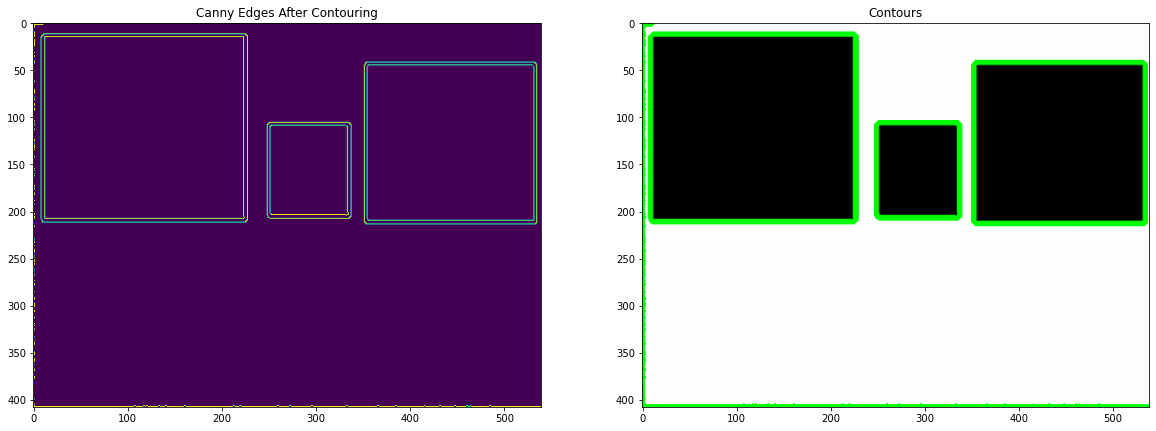

In [87]:
import cv2 
import numpy as np 
  
# Let's load a simple image with 3 black squares 
image = cv2.imread('img/Shapes1.png') 
cv2.waitKey(0) 
  
# Grayscale 
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) 
  
# Find Canny edges 
edged = cv2.Canny(gray, 30, 200) 
cv2.waitKey(0) 
  
# Finding Contours 
# Use a copy of the image e.g. edged.copy() 
# since findContours alters the image 
contours, hierarchy = cv2.findContours(edged,  
    cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE) 
  
cv2.imshow('Canny Edges After Contouring', edged) 
cv2.waitKey(0) 
  
print("Number of Contours found = " + str(len(contours))) 
  
# Draw all contours 
# -1 signifies drawing all contours 
cv2.drawContours(image, contours, -1, (0, 255, 0), 3) 
  
cv2.imshow('Contours', image) 
cv2.waitKey(0) 
cv2.destroyAllWindows() 

plt.figure(figsize=(20,20))
 
plt.subplot(121), plt.imshow(edged), plt.title("Canny Edges After Contouring")
plt.subplot(122), plt.imshow(image), plt.title("Contours")
plt.show()

# Link 6

### Draw a rectangular shape and extract objects using Python’s OpenCV

In [4]:
# Python program to extract rectangular 
# Shape using OpenCV in Python3 
import cv2 
import numpy as np 
  
drawing = False     # true if mouse is pressed 
mode = True         # if True, draw rectangle. 
ix, iy = -1, -1
  
# mouse callback function 
def draw_circle(event, x, y, flags, param): 
    global ix, iy, drawing, mode 
      
    if event == cv2.EVENT_LBUTTONDOWN: 
        drawing = True
        ix, iy = x, y 
      
    elif event == cv2.EVENT_MOUSEMOVE: 
        if drawing == True: 
            if mode == True: 
                cv2.rectangle(img, (ix, iy), (x, y), (0, 255, 0), 3) 
                a = x 
                b = y 
                if a != x | b != y: 
                    cv2.rectangle(img, (ix, iy), (x, y), (0, 0, 0), -1) 
            else: 
                cv2.circle(img, (x, y), 5, (0, 0, 255), -1) 
      
    elif event == cv2.EVENT_LBUTTONUP: 
        drawing = False
        if mode == True: 
            cv2.rectangle(img, (ix, iy), (x, y), (0, 255, 0), 2) 
      
        else: 
            cv2.circle(img, (x, y), 5, (0, 0, 255), -1) 
      
img = np.zeros((512, 512, 3), np.uint8) 
cv2.namedWindow('image') 
cv2.setMouseCallback('image', draw_circle) 
  
while(1): 
    cv2.imshow('image', img) 
    k = cv2.waitKey(1) & 0xFF
    if k == ord('m'): 
        mode = not mode 
    elif k == 27: 
        break
  
cv2.destroyAllWindows() 

Above piece of code will work with only black background image. But rectangles can be drawn to any images. We can write a program which allows us to select desired portion in an image and extract that selected portion as well. The task includes following things –

- draw shape on any image
- re-select the extract portion for in case bad selection
- extract particular object from the image

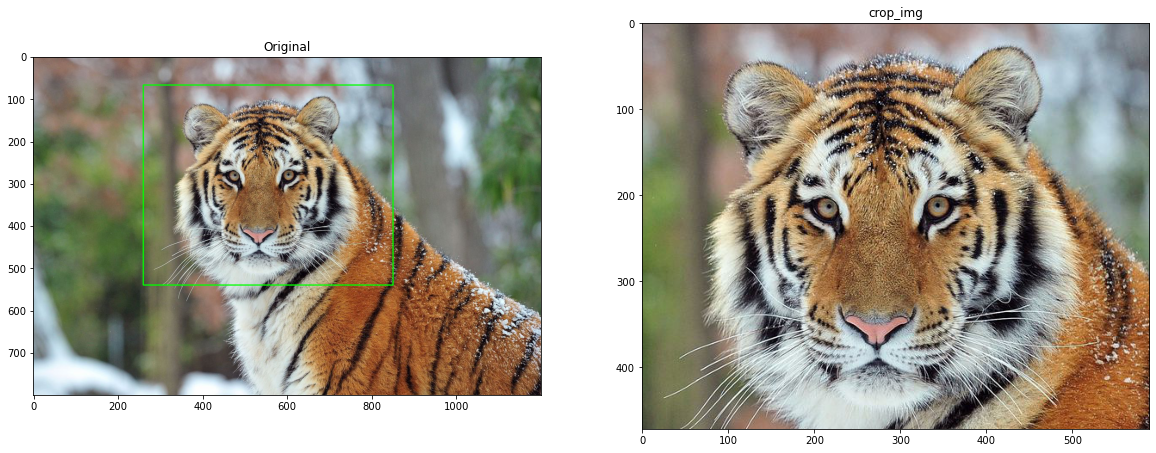

In [3]:
# Capture the mouse click events in Python and OpenCV
'''
-> draw shape on any image 
-> reset shape on selection
-> crop the selection
run the code : python capture_events.py --image image_example.jpg
'''


# import the necessary packages
import argparse
import cv2
import matplotlib.pyplot as plt

# initialize the list of reference points and boolean indicating
# whether cropping is being performed or not
ref_point = []
cropping = False

def shape_selection(event, x, y, flags, param):
  # grab references to the global variables
  global ref_point, cropping

  # if the left mouse button was clicked, record the starting
  # (x, y) coordinates and indicate that cropping is being
  # performed
  if event == cv2.EVENT_LBUTTONDOWN:
    ref_point = [(x, y)]
    cropping = True

  # check to see if the left mouse button was released
  elif event == cv2.EVENT_LBUTTONUP:
    # record the ending (x, y) coordinates and indicate that
    # the cropping operation is finished
    ref_point.append((x, y))
    cropping = False

    # draw a rectangle around the region of interest
    cv2.rectangle(image, ref_point[0], ref_point[1], (0, 255, 0), 2)
    cv2.imshow("image", image)

# construct the argument parser and parse the arguments
# ap = argparse.ArgumentParser()
# ap.add_argument("-i", "--image", required=True, help="Path to the image")
# args = vars(ap.parse_args())

# load the image, clone it, and setup the mouse callback function
# image = cv2.imread(args["image"])
image = cv2.imread('img/Tiger.jpg',cv2.IMREAD_COLOR)
clone = image.copy()
cv2.namedWindow("image")
cv2.setMouseCallback("image", shape_selection)

# keep looping until the 'q' key is pressed
while True:
  # display the image and wait for a keypress
  cv2.imshow("image", image)
  key = cv2.waitKey(1) & 0xFF

  # if the 'r' key is pressed, reset the cropping region
  if key == ord("r"):
    image = clone.copy()

  # if the 'c' key is pressed, break from the loop
  elif key == ord("c"):
    break

# if there are two reference points, then crop the region of interest
# from teh image and display it
if len(ref_point) == 2:
  crop_img = clone[ref_point[0][1]:ref_point[1][1], ref_point[0][0]:ref_point[1][0]]
  cv2.imshow("crop_img", crop_img)
  cv2.waitKey(0)

# close all open windows
cv2.destroyAllWindows()

plt.figure(figsize=(20,20))
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) 
plt.subplot(121), plt.imshow(image), plt.title("Original")
crop_img = cv2.cvtColor(crop_img, cv2.COLOR_BGR2RGB) 
plt.subplot(122), plt.imshow(crop_img), plt.title("crop_img")
plt.show()

In [2]:
import cv2
import numpy as np
drawing = False # true if mouse is pressed
mode = True # if True, draw rectangle. Press 'm' to toggle to curve
ix,iy = -1,-1
x_, y_ = 0,0
r = 15 #circle radius
# mouse callback function
def draw_shape(event,x,y,flags,param):
    print(event)
    global ix,iy,drawing,mode,x_,y_, r

    if event == cv2.EVENT_LBUTTONDOWN:
        print('inside mouse lbutton event....')
        drawing = True
        ix,iy = x,y
        x_,y_ = x,y
    elif event == cv2.EVENT_MOUSEMOVE and drawing:
        copy = img.copy()
        x_,y_ = x,y
        if mode:
            cv2.rectangle(copy,(ix,iy),(x_,y_),(0,255,0),1)
            cv2.imshow("image", copy)
        else:
            cv2.circle(copy,(x,y),r,(0,0,255),1)
            cv2.imshow('image', copy)
    #
    elif event == cv2.EVENT_LBUTTONUP:
        print('inside mouse button up event')
        drawing = False
        if mode:
            cv2.rectangle(img,(ix,iy),(x,y),(0,255,0),1)
        else:
            cv2.circle(img,(x,y),r,(0,0,255),1)


img = np.zeros((512,512,3), np.uint8)
temp_img = np.copy(img)
cv2.namedWindow('image')
cv2.setMouseCallback('image',draw_shape)
while(1):
    # print('inside while loop...')
    cv2.imshow('image',img)
    if not cv2.EVENT_MOUSEMOVE:
        copy = img.copy()
        # print('x_: , y_ : '.format(x_,y_))
        print(x_)
        if mode == True:
            cv2.rectangle(copy,(ix,iy),(x_,y_),(0,255,0),1)
            cv2.imshow('image',copy)
        else:
            cv2.circle(copy,(x_,y_),r,(0,0,255),1)
            cv2.imshow('image',copy)
    k = cv2.waitKey(1) & 0xFF
    if k == ord('m'): #toggle between circle and rectangle
        mode = not mode
        x_,y_ = -10,-10
        ix,iy = -10,-10
    elif k == ord('r') and not mode: #make circle bigger
        r += 1
    elif k == ord('t') and not mode: #make circle smaller
        if r <=2:
            r = 1
        else:
            r -= 1
    elif k == ord('x'): #resets the image (removes circles and rectangles)
        img = np.copy(temp_img)
        x_,y_ = -10,-10
        ix,iy = -10,-10
    elif k == 27:
        break
cv2.destroyAllWindows()

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


417
417
417
417
417
417
417
417
417
417
417
417
417
417
417
417
417
417
417
417
417
417
417
417
417
417
417
417
417
417
417
417
417
417
417
417
417
417
417
417
417
417
417
417
417
417
417
417
417
417
417
417
417
417
417
417
417
417
417
417
417
417
417
417
417
417
417
417
417
417
417
417
417
417
417
417
417
417
417
417
417
417
417
417
417
417
417
417
417
417
417
417
417
417
417
417
417
417
417
417
417
417
417
417
417
417
417
417
417
417
417
417
417
417
417
417
417
417
417
417
417
417
417
417
417
417
417
417
417
417
417
417
417
417
417
417
417
417
417
417
417
417
417
417
417
417
417
417
417
417
417
417
417
417
417
417
417
417
417
417
417
417
417
417
417
417
417
417
417
417
417
417
417
417
417
417
417
417
417
417
417
417
417
417
417
417
417
417
417
417
417
417
417
417
417
417
417
417
417
417
417
417
417
417
417
417
417
417
417
417
417
417
417
417
417
417
417
417
417
417
417
417
417
417
417
417
417
417
417
417
417
417
417
417
417
417
417
417
417
417
417
417
417
417
417
417
417
417
417
417


191
191
191
191
191
191
191
191
191
191
191
191
191
191
191
191
191
191
191
191
191
191
191
191
191
191
191
191
191
191
191
191
191
191
191
191
191
191
191
191
191
191
191
191
191
191
191
191
191
191
191
191
191
191
191
191
191
191
191
191
0
191
191
0
191
0
191
191
0
191
191
0
191
0
191
191
0
191
191
0
191
191
0
191
191
0
191
0
191
191
0
191
191
0
191
0
191
191
191
191
191
191
191
191
191
191
191
191
191
191
191
191
191
191
191
191
191
191
191
191
191
191
191
191
1
inside mouse lbutton event....
280
280
280
280
280
280
280
280
280
280
280
280
280
280
280
280
0
280
0
281
0
285
285
0
291
0
297
0
300
0
302
0
303
0
303
303
303
303
303
0
304
304
304
304
304
304
304
304
304
304
0
304
304
304
304
304
304
304
304
304
304
304
304
304
304
0
305
4
inside mouse button up event
305
305
305
0
305
305
305
305
305
305
305
305
305
305
305
305
305
305
305
305
305
305
305
305
305
305
305
305
305
0
305
305
0
305
305
0
305
305
0
305
305
0
305
0
305
305
0
305
305
0
305
305
0
305
0
305
305
0
305
305
0
305
0


454
454
454
454
454
454
454
454
454
454
454
454
454
454
454
454
454
454
454
454
454
454
454
454
454
454
454
454
454
454
454
454
454
454
454
454
454
454
454
454
454
454
454
454
454
454
454
454
454
454
454
454
454
454
454
454
454
454
454
454
454
454
454
454
454
454
454
454
454
454
454
454
454
454
454
454
454
454
454
454
454
454
454
454
454
454
454
454
454
454
454
454
454
454
454
454
454
454
454
454
454
454
454
454
454
454
454
454
454
454
454
454
454
454
454
454
454
454
454
454
454
454
454
454
454
454
454
454
454
454
454
454
454
454
454
454
454
454
454
454
454
454
454
454
454
454
454
454
454
454
454
454
454
454
454
454
454
454
454
454
454
454
454
454
454
454
454
454
454
454
454
454
454
454
454
454
454
454
454
454
454
454
454
454
454
454
454
454
454
454
454
454
454
454
454
454
454
454
454
454
454
454
454
454
454
454
454
454
454
454
454
454
454
454
454
454
454
454
454
454
454
454
454
454
454
454
454
454
454
454
454
454
454
454
454
454
454
454
454
454
454
454
454
454
454
454
454
454
454
454


124
124
124
124
124
124
124
124
124
124
124
124
124
124
124
124
124
124
124
124
124
124
124
124
124
124
124
124
124
124
124
124
124
124
124
124
124
124
124
124
124
124
124
124
124
124
124
124
124
124
124
124
124
124
124
124
124
124
124
124
124
124
124
124
124
124
124
124
124
124
124
124
124
124
124
124
124
124
124
124
124
124
124
124
124
124
124
124
124
124
124
124
124
124
124
124
124
124
124
124
124
124
124
124
124
124
124
124
124
124
124
124
124
124
124
124
124
124
124
124
124
124
124
124
124
124
124
124
124
124
124
124
124
124
124
124
124
124
124
124
124
124
124
124
124
124
124
124
124
124
124
124
124
124
124
124
124
124
124
124
124
124
124
124
124
124
124
124
124
124
124
124
124
124
124
124
124
124
124
124
124
124
124
124
124
124
124
124
124
124
124
124
124
124
124
124
124
124
124
124
124
124
124
124
124
124
124
124
124
124
124
124
124
124
124
124
124
124
124
124
124
124
124
124
124
124
124
124
124
124
124
124
124
124
124
124
124
124
124
124
124
124
124
124
124
124
124
124
124
124


# Link 7

### Python OpenCV | cv2.rectangle() method

Syntax: cv2.rectangle(image, start_point, end_point, color, thickness)

Parameters:

- image: It is the image on which rectangle is to be drawn.
- start_point: It is the starting coordinates of rectangle. The coordinates are represented as tuples of two values i.e. (X coordinate value, Y coordinate value).
- end_point: It is the ending coordinates of rectangle. The coordinates are represented as tuples of two values i.e. (X coordinate value, Y coordinate value).
- color: It is the color of border line of rectangle to be drawn. For BGR, we pass a tuple. eg: (255, 0, 0) for blue color.
- thickness: It is the thickness of the rectangle border line in px. Thickness of -1 px will fill the rectangle shape by the specified color.

- Return Value: It returns an image.

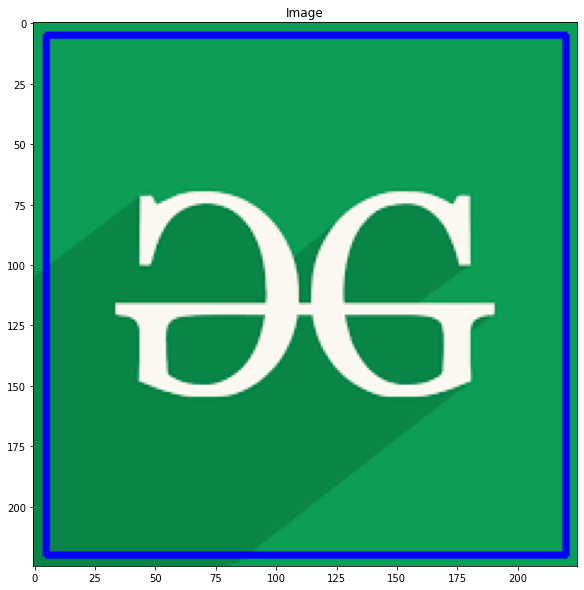

In [7]:
# Python program to explain cv2.rectangle() method  
from matplotlib import pyplot as plt 
# importing cv2  
import cv2  
   
# path  
path = r'img/geeks.png'
   
# Reading an image in default mode 
image = cv2.imread(path) 
   
# Window name in which image is displayed 
window_name = 'Image'
  
# Start coordinate, here (5, 5) 
# represents the top left corner of rectangle 
start_point = (5, 5) 
  
# Ending coordinate, here (220, 220) 
# represents the bottom right corner of rectangle 
end_point = (220, 220) 
  
# Blue color in BGR 
color = (255, 0, 0) 
  
# Line thickness of 2 px 
thickness = 2
  
# Using cv2.rectangle() method 
# Draw a rectangle with blue line borders of thickness of 2 px 
image = cv2.rectangle(image, start_point, end_point, color, thickness) 
  
# Displaying the image  
#cv2.imshow(window_name, image) 
# cv2.waitKey(0) 
  
# # close all open windows 
# cv2.destroyAllWindows()  

plt.figure(figsize=(10,10))
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) 
plt.subplot(111),plt.title(window_name), plt.imshow(image)
plt.show()

Using thickness of -1 px to fill the rectangle by black color.

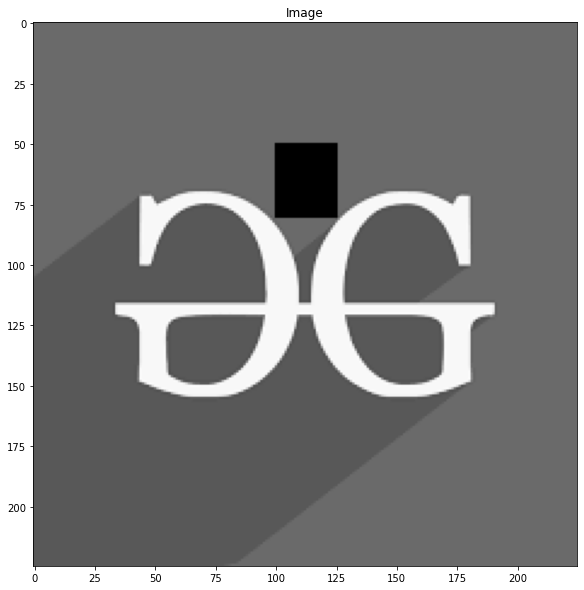

In [8]:
# Python program to explain cv2.rectangle() method  
    
# importing cv2  
import cv2  
    
# path  
path = r'img/geeks.png'
    
# Reading an image in grayscale mode 
image = cv2.imread(path, 0) 
    
# Window name in which image is displayed 
window_name = 'Image'
   
# Start coordinate, here (100, 50) 
# represents the top left corner of rectangle 
start_point = (100, 50) 
   
# Ending coordinate, here (125, 80) 
# represents the bottom right corner of rectangle 
end_point = (125, 80) 
   
# Black color in BGR 
color = (0, 0, 0) 
   
# Line thickness of -1 px 
# Thickness of -1 will fill the entire shape 
thickness = -1
   
# Using cv2.rectangle() method 
# Draw a rectangle of black color of thickness -1 px 
image = cv2.rectangle(image, start_point, end_point, color, thickness) 
   
# Displaying the image  
#cv2.imshow(window_name, image) 

plt.figure(figsize=(10,10))
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) 
plt.subplot(111),plt.title(window_name), plt.imshow(image)
plt.show()

# Link 8

### Python OpenCV | cv2.putText() method

Syntax: cv2.putText(image, text, org, font, fontScale, color[, thickness[, lineType[, bottomLeftOrigin]]])

Parameters:

1. image: It is the image on which text is to be drawn.
2. text: Text string to be drawn.
3. org: It is the coordinates of the bottom-left corner of the text string in the image. The coordinates are represented as tuples of two values i.e. (X coordinate value, Y coordinate value).
4. font: It denotes the font type. Some of font types are FONT_HERSHEY_SIMPLEX, FONT_HERSHEY_PLAIN, , etc.
5. fontScale: Font scale factor that is multiplied by the font-specific base size.
6. color: It is the color of text string to be drawn. For BGR, we pass a tuple. eg: (255, 0, 0) for blue color.
7. thickness: It is the thickness of the line in px.
8. lineType: This is an optional parameter.It gives the type of the line to be used.
9. bottomLeftOrigin: This is an optional parameter. When it is true, the image data origin is at the bottom-left corner. Otherwise, it is at the top-left corner.

10. Return Value: It returns an image.

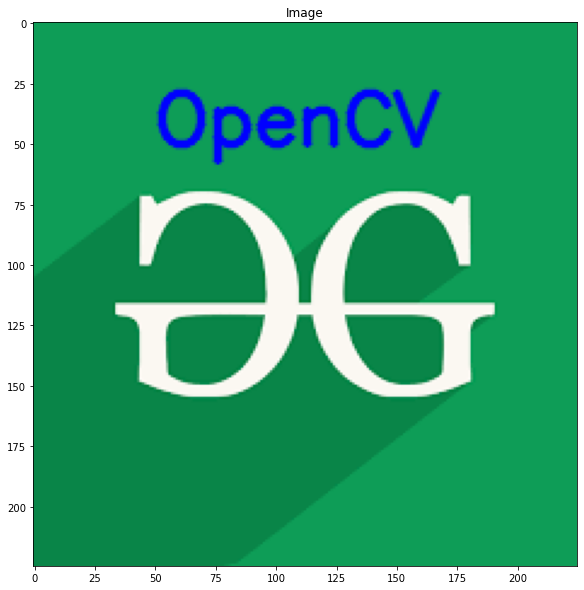

In [9]:
# Python program to explain cv2.putText() method 
    
# importing cv2 
import cv2 
    
# path 
path = r'img/geeks.png'
    
# Reading an image in default mode 
image = cv2.imread(path) 
    
# Window name in which image is displayed 
window_name = 'Image'
  
# font 
font = cv2.FONT_HERSHEY_SIMPLEX 
  
# org 
org = (50, 50) 
  
# fontScale 
fontScale = 1
   
# Blue color in BGR 
color = (255, 0, 0) 
  
# Line thickness of 2 px 
thickness = 2
   
# Using cv2.putText() method 
image = cv2.putText(image, 'OpenCV', org, font,  
                   fontScale, color, thickness, cv2.LINE_AA) 
   
# # Displaying the image 
# cv2.imshow(window_name, image)  

plt.figure(figsize=(10,10))
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) 
plt.subplot(111),plt.title(window_name), plt.imshow(image)
plt.show()

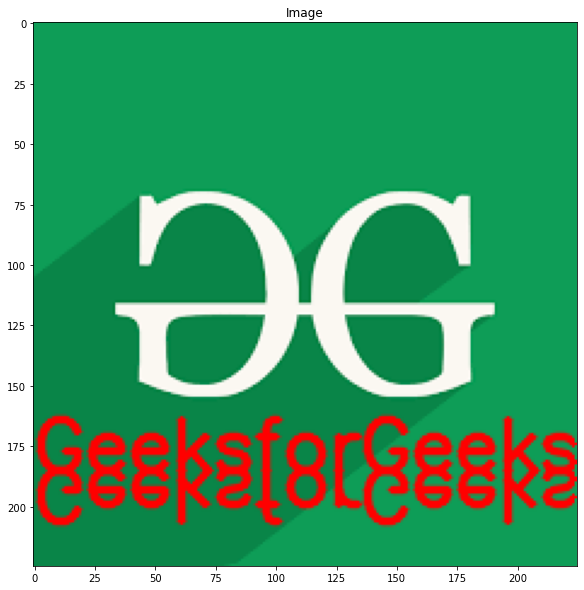

In [10]:
# Python program to explain cv2.putText() method 
    
# importing cv2 
import cv2 
    
# path 
path = r'img/geeks.png'
    
# Reading an image in default mode 
image = cv2.imread(path) 
    
# Window name in which image is displayed 
window_name = 'Image'
  
# text 
text = 'GeeksforGeeks'
  
# font 
font = cv2.FONT_HERSHEY_SIMPLEX 
  
# org 
org = (00, 185) 
  
# fontScale 
fontScale = 1
   
# Red color in BGR 
color = (0, 0, 255) 
  
# Line thickness of 2 px 
thickness = 2
   
# Using cv2.putText() method 
image = cv2.putText(image, text, org, font, fontScale,  
                 color, thickness, cv2.LINE_AA, False) 
  
# Using cv2.putText() method 
image = cv2.putText(image, text, org, font, fontScale, 
                  color, thickness, cv2.LINE_AA, True)  
  
# Displaying the image 
# cv2.imshow(window_name, image)
plt.figure(figsize=(10,10))
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) 
plt.subplot(111),plt.title(window_name), plt.imshow(image)
plt.show()